*Este conjunto de datos contiene 13 características clínico-patológicas destinadas a predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló durante 15 años y cada paciente fue seguido durante al menos 10 años.*
# CONTENIDO:
**• Edad:** La edad del paciente en el momento del diagnóstico o tratamiento.

**• Género:** El sexo del paciente (masculino o femenino).

**• Tabaquismo:** Si el paciente es fumador o no.

**• Tabaquismo Hx:** Historial de tabaquismo del paciente (p. ej., si alguna vez ha fumado).

**• Radioterapia Hx:** Historial de tratamiento con radioterapia para cualquier condición.

**• Función tiroidea:** El estado de la función tiroidea, que posiblemente indique si hay alguna anomalía.

**• Examen físico:** Hallazgos de un examen físico del paciente, que puede incluir palpación de la glándula tiroides y las estructuras circundantes.

**• Adenopatía:** Presencia o ausencia de ganglios linfáticos agrandados (adenopatía) en la región del cuello.

**• Patología:** Tipos específicos de cáncer de tiroides según lo determinado por el examen patológico de muestras de biopsia.

**• Focalidad:** Si el cáncer es unifocal (limitado a una ubicación) o multifocal (presente en múltiples ubicaciones).

**• Riesgo:** La categoría de riesgo del cáncer basada en varios factores, como el tamaño del tumor, el grado de diseminación y el tipo histológico.

**• T:** Clasificación del tumor según su tamaño y extensión de la invasión a estructuras cercanas.

**• N:** Clasificación ganglionar que indica la afectación de los ganglios linfáticos.

**• M:** Clasificación de metástasis que indica la presencia o ausencia de metástasis a distancia.

**• Estadio:** El estadio general del cáncer, generalmente determinado combinando las clasificaciones T, N y M.

**• Respuesta:** Respuesta al tratamiento, que indica si el cáncer respondió positiva, negativamente o permaneció estable después del tratamiento.

**• Recurrente:** Indica si el cáncer ha recurrido después del tratamiento inicial.

***LINK: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data***

In [1652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io

In [1653]:
url = "https://raw.githubusercontent.com/DawnHarper/TP-FINAL-MATE-III/main/tiroides.csv"
df = pd.read_csv(url)

In [1654]:
df.head(11)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [1655]:
print(df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [1656]:
gen_rep = {
    "F": 0,  # Mujer
    "M": 1   # Hombre
}

smok_rep = {
    "No": 1,
    "Yes": 0
}

HxSmok_rep = {
    "No": 1,
    "Yes": 0
}

HxRad_rep = {
    "No": 1,
    "Yes": 0
}

ThyroidFunc_rep = {
    "Euthyroid": 0,
    "Clinical Hyperthyroidism": 1,
    "Subclinical Hyperthyroidism": 2,
    "Subclinical Hypothyroidism": 3,
    "Clinical Hypothyroidism": 4
}

PhysicalExam_rep = {
    "Multinodular goiter": 0,
    "Single nodular goiter-right": 1,
    "Single nodular goiter-left": 2,
    "Normal": 3,
    "Diffuse goiter": 4
}

Adenopathy_rep = {
    "No": 0,
    "Right": 1,
    "Bilateral": 2,
    "Left": 3,
    "Extensive": 4
}

Pathology_rep = {
    "Papillary": 0,
    "Micropapillary": 1,
    "Follicular": 2,
    "Hurthel cell": 3
}

Focality_rep = {
    "Uni-Focal": 0,
    "Multi-Focal": 1
}

Risk_rep = {
    "Low": 0,
    "Intermediate": 1,
    "High": 2
}

T_rep = {
    "T1a": 0,
    "T1b": 1,
    "T2": 2,
    "T3a": 3,
    "T4a": 4,
    "T4b": 5
}

N_rep = {
    "N0": 0,
    "N1a": 1,
    "N1b": 2
}

M_rep = {
    "M0": 0,
    "M1": 1
}

Stage_rep = {
    "I": 0,
    "II": 1,
    "III": 2,
    "IVA": 3,
    "IVB": 4
}

Response_rep = {
    "Excellent": 0,
    "Structural Incomplete": 1,
    "Indeterminate": 2,
    "Biochemical Incomplete": 3
}

Recurred_rep = {
    "No": 1,
    "Yes": 0
}

In [1657]:
rep_d = {
    "Gender": gen_rep,
    "Smoking": smok_rep,
    "Hx Smoking": HxSmok_rep,
    "Hx Radiothreapy": HxRad_rep,
    "Thyroid Function": ThyroidFunc_rep,
    "Physical Examination": PhysicalExam_rep,
    "Adenopathy": Adenopathy_rep,
    "Pathology": Pathology_rep,
    "Focality": Focality_rep,
    "Risk": Risk_rep,
    "T": T_rep,
    "N": N_rep,
    "M": M_rep,
    "Stage": Stage_rep,
    "Response": Response_rep,
    "Recurred": Recurred_rep
}

In [1658]:
# Reemplaza los valores
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
print("\nDataFrame despues de reemplazos:")
df.head()


DataFrame despues de reemplazos:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,1,1,1,0,2,0,1,0,0,0,0,0,0,2,1
1,34,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,30,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
3,62,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,62,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1


In [1659]:
df["Adenopathy"] = pd.to_numeric(df["Adenopathy"], errors="coerce")
df["T"] = pd.to_numeric(df["T"], errors="coerce")

In [1660]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,381.000000,383.000000,383.000000,383.000000,367.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.872063,0.926893,0.981723,0.313316,0.958225,0.501312,0.428198,0.355091,0.433420,2.051771,0.543081,0.046997,0.242820,0.736292,0.718016
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.915832,0.914301,0.953179,0.840368,0.479167,0.643233,1.152351,0.857732,0.211910,0.773274,0.935576,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.500000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.000000,2.000000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [1661]:
# Normaliza
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Normalización
print("\nDataFrame normalizado:")
df_n.describe()


DataFrame normalizado:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.810000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.670000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02
mean,-5.565609e-17,-1.484162e-16,-9.276015e-17,1.159502e-16,-1.669683e-16,4.638007e-17,0.000000,-3.729883e-17,6.957011e-18,-1.484162e-16,1.484162e-16,-1.548867e-16,-7.420812e-17,5.565609e-17,7.420812e-17,0.000000,1.113122e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.709132e+00,-4.764136e-01,-2.607399e+00,-3.556047e+00,-7.319429e+00,-3.421106e-01,-1.048040,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-1.780508e+00,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,-1.593627e+00
25%,-7.840923e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,-1.048040,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-4.788220e-01,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,-1.593627e+00
50%,-2.554985e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,0.045691,-5.259370e-01,-5.095368e-01,-7.410598e-01,-6.738150e-01,-4.492651e-02,-6.331591e-01,-2.217799e-01,-3.140154e-01,-0.786994,6.258609e-01
75%,6.695407e-01,-4.764136e-01,3.825226e-01,2.804769e-01,1.362660e-01,-3.421106e-01,1.139423,5.231834e-01,8.544062e-02,1.345895e+00,8.808305e-01,8.228644e-01,5.327059e-01,-2.217799e-01,-3.140154e-01,0.281867,6.258609e-01
max,2.717842e+00,2.093536e+00,3.825226e-01,2.804769e-01,1.362660e-01,4.025501e+00,3.326886,3.670545e+00,3.060328e+00,1.345895e+00,2.435476e+00,2.558446e+00,1.698571e+00,4.497203e+00,4.858797e+00,2.419587,6.258609e-01


In [1662]:
df.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,381.000000,383.000000,383.000000,383.000000,367.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.872063,0.926893,0.981723,0.313316,0.958225,0.501312,0.428198,0.355091,0.433420,2.051771,0.543081,0.046997,0.242820,0.736292,0.718016
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.915832,0.914301,0.953179,0.840368,0.479167,0.643233,1.152351,0.857732,0.211910,0.773274,0.935576,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.500000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.000000,2.000000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [1663]:
# Calcula y muestra la matriz de correlacion
corr_matrix = df_n.corr()
print("\nMatriz de correlacion:")
df_n.corr()


Matriz de correlacion:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.186457,-0.309536,-0.134531,-0.176588,0.027759,-0.075319,0.080452,0.170184,0.223847,0.295556,0.208384,0.061243,0.235401,0.526862,0.210680,-0.258897
Gender,0.186457,1.000000,-0.621886,-0.175755,-0.235865,0.027581,-0.051757,0.257792,0.036809,0.207634,0.295229,0.256371,0.238766,0.211540,0.250215,0.149018,-0.328189
Smoking,-0.309536,-0.621886,1.000000,0.252773,0.297874,-0.005534,-0.000402,-0.242439,-0.214388,-0.238494,-0.374324,-0.344129,-0.204305,-0.321233,-0.426152,-0.166665,0.333243
Hx Smoking,-0.134531,-0.175755,0.252773,1.000000,0.261198,-0.101187,0.075028,-0.084143,-0.119635,-0.001204,-0.138403,-0.093453,-0.044421,-0.127209,-0.262371,-0.068529,0.136073
Hx Radiothreapy,-0.176588,-0.235865,0.297874,0.261198,1.000000,0.004118,0.015104,-0.194856,-0.092961,-0.102415,-0.272056,-0.201452,-0.095535,-0.430214,-0.461901,-0.059371,0.174407
Thyroid Function,0.027759,0.027581,-0.005534,-0.101187,0.004118,1.000000,0.028178,-0.012504,0.059919,0.032147,0.004397,-0.060594,-0.023893,-0.022117,0.032757,-0.001085,0.049726
Physical Examination,-0.075319,-0.051757,-0.000402,0.075028,0.015104,0.028178,1.000000,-0.048276,0.132368,-0.258842,-0.178339,-0.145699,-0.151250,0.050694,-0.089289,-0.077179,0.111134
Adenopathy,0.080452,0.257792,-0.242439,-0.084143,-0.194856,-0.012504,-0.048276,1.000000,-0.115467,0.328117,0.603629,0.415977,0.775531,0.233402,0.276248,0.202043,-0.583665
Pathology,0.170184,0.036809,-0.214388,-0.119635,-0.092961,0.059919,0.132368,-0.115467,1.000000,0.069983,0.009294,-0.020436,-0.225405,0.033699,0.077255,0.040781,0.029352
Focality,0.223847,0.207634,-0.238494,-0.001204,-0.102415,0.032147,-0.258842,0.328117,0.069983,1.000000,0.450615,0.424517,0.376692,0.221931,0.331892,0.215266,-0.383776


In [1664]:
features = ["Age", "Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy", "Thyroid Function", "Physical Examination",
            "Adenopathy", "Pathology", "Focality", "Risk", "Stage", "Response"]

df[features] = df[features] / df[features].max()

In [1665]:
df[df["Recurred"]==0].head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
48,0.317073,0.0,1.0,1.0,1.0,0.0,0.75,1.00,0.000000,0.0,0.5,0.0,2,0,0.0,0.333333,0
87,0.439024,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.000000,1.0,0.0,1.0,0,0,0.0,0.666667,0
88,0.426829,0.0,1.0,1.0,1.0,0.0,0.00,0.25,0.000000,1.0,0.5,1.0,2,0,0.0,0.333333,0
89,0.378049,1.0,0.0,1.0,1.0,0.0,0.00,0.25,0.000000,1.0,0.5,1.0,2,0,0.0,0.333333,0
90,0.219512,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.000000,0.0,0.5,1.0,2,0,0.0,0.333333,0
91,0.756098,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.666667,1.0,0.5,1.0,0,0,0.0,0.333333,0
223,0.682927,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.000000,0.0,0.0,2.0,0,0,0.0,0.333333,0
224,0.243902,1.0,1.0,1.0,1.0,0.0,0.25,0.25,0.000000,0.0,0.0,2.0,0,0,0.0,0.333333,0
225,0.756098,0.0,1.0,1.0,1.0,1.0,0.00,0.00,0.000000,0.0,0.0,2.0,0,0,0.0,1.000000,0
226,0.207317,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.000000,0.0,1.0,2.0,0,0,0.0,0.333333,0


In [1666]:
df[df["Recurred"]==1].head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.329268,0.0,1.0,1.0,1.0,0.00,0.50,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.666667,1
1,0.414634,0.0,1.0,0.0,1.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
2,0.365854,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
3,0.756098,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
4,0.756098,0.0,1.0,1.0,1.0,0.00,0.00,0.0,0.333333,1.0,0.0,0.0,0,0,0.0,0.000000,1
5,0.634146,1.0,0.0,1.0,1.0,0.00,0.00,0.0,0.333333,1.0,0.0,0.0,0,0,0.0,0.666667,1
6,0.500000,0.0,1.0,0.0,1.0,0.25,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
7,0.560976,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
8,0.621951,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
9,0.487805,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1


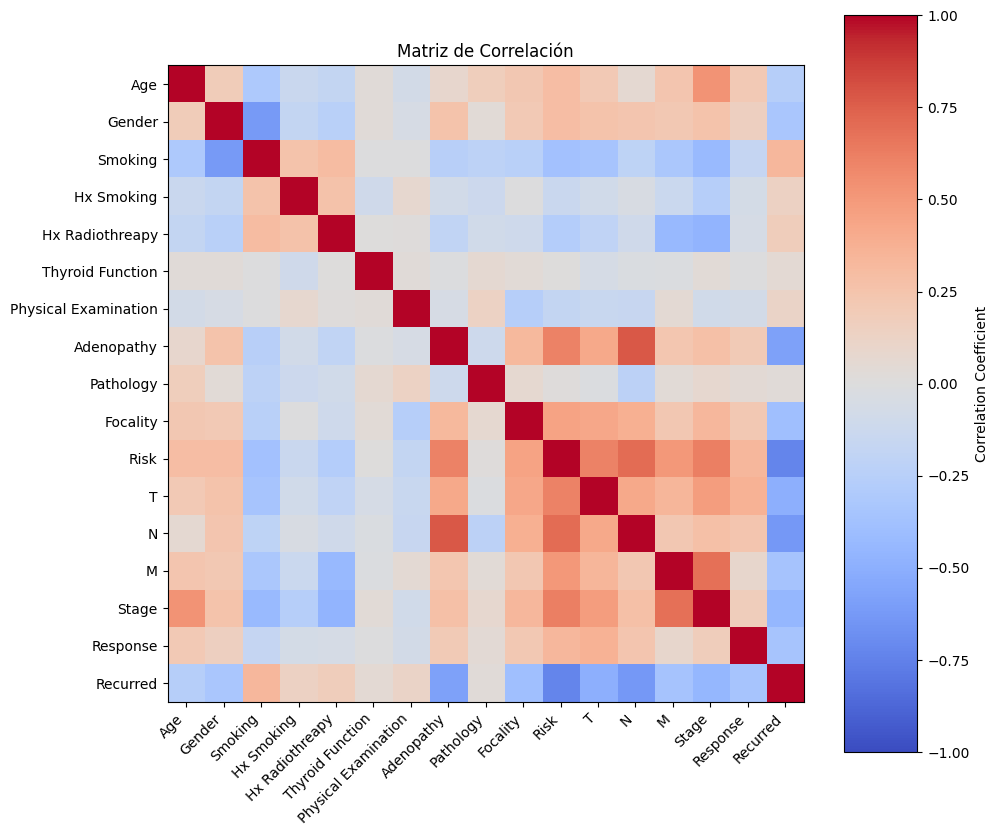

In [1667]:
# Visualiza la matriz de correlacion
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlacion
cax = ax.imshow(corr_matrix.to_numpy(), cmap='coolwarm', vmin=-1, vmax=1)

# Ajusta
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# Añade una barra de color
cbar = fig.colorbar(cax, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Correlation Coefficient')

# Añade título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
plt.tight_layout()

plt.show()

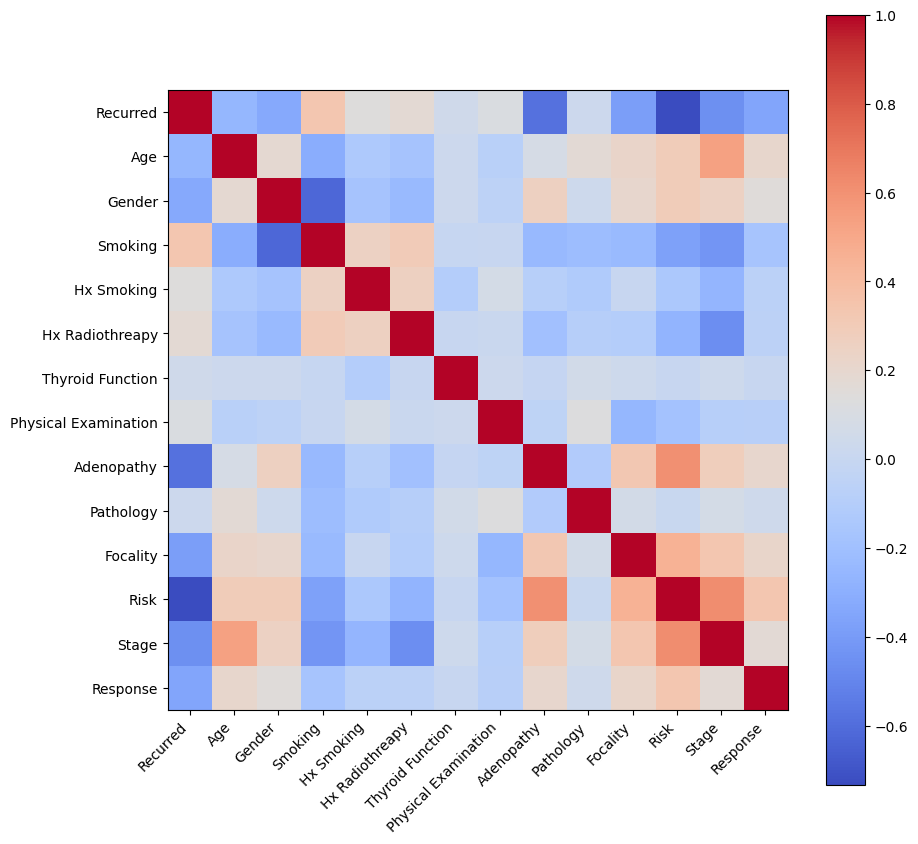

In [1668]:
# Agrega la columna objetivo 'Recurred' a la lista de características
labels = df.loc[:, ["Recurred"] + features].columns.to_list()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlación con el tema 'coolwarm'
cax = ax.imshow(df.loc[:, ["Recurred"] + features].corr().to_numpy(), cmap='coolwarm')

# Establece las etiquetas de los ejes
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(labels, ha='right')

# Agrega una barra de color para mostrar la escala de correlación
fig.colorbar(cax)

plt.show()

In [1669]:
X = df[features].values
Y = df['Recurred'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

In [1670]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
#np.random.seed(8)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(7, 13)
w_output = np.random.rand(1, 7)

b_hidden = np.random.rand(7, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion (Leaky ReLU y Logistic)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


print(b_hidden)
print(b_output)
print(w_hidden)
print(w_output)

# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    print(f'{Z1=}')
    A1 = relu(Z1)
    print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

255
[[0.18640522]
 [0.71584363]
 [0.77935017]
 [0.70012999]
 [0.74361789]
 [0.26025641]
 [0.66200414]]
[[0.91722202]]
[[0.27522643 0.16020514 0.49579922 0.96527488 0.82156147 0.19076632
  0.07569482 0.33665141 0.59593715 0.61607376 0.34658015 0.48263946
  0.87731276]
 [0.89160012 0.17186337 0.61393468 0.39368879 0.51746307 0.43765557
  0.42487625 0.20869614 0.55789813 0.09272018 0.24654975 0.38549708
  0.45437685]
 [0.02295322 0.0231051  0.65949918 0.41610965 0.65508509 0.09620864
  0.07873195 0.84952499 0.8226404  0.44083531 0.69065784 0.68813144
  0.11096345]
 [0.80088673 0.60069565 0.68869643 0.64699925 0.3370067  0.13808439
  0.68573322 0.91381177 0.46176572 0.8512789  0.56415439 0.70797695
  0.49616124]
 [0.08098276 0.04078451 0.52085963 0.93528885 0.82766095 0.14053536
  0.64883874 0.57229974 0.16926372 0.45552965 0.74691456 0.47113363
  0.20821121]
 [0.02079442 0.82367828 0.32468184 0.01791181 0.10219484 0.61366684
  0.95609219 0.30868319 0.5985139  0.55264984 0.79080726 0.44555

In [1671]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

Z1=array([[2.58315907, 4.36961168, 2.55966413, 2.87559666, 3.48903515,
        3.16618445, 3.03244538, 2.29223486, 4.2915824 , 2.82047348,
        2.8574996 , 2.61215203, 3.87329443, 3.98268668, 4.29341872,
        3.37436784, 3.67759537, 2.57980265, 3.32915344, 2.70948821,
        4.23820616, 3.30633966, 3.2347055 , 2.65578549, 3.88724127,
        3.28539664, 2.59201351, 3.9699964 , 3.64025074, 2.85778763,
        3.58594772, 2.61093722, 3.47764443, 3.23279703, 4.57312623,
        3.27783364, 3.6139514 , 3.54171055, 2.2409806 , 3.69112072,
        4.60333401, 4.35627865, 2.58194425, 2.82972145, 2.78730281,
        2.80744133, 3.78746443, 3.14870322, 3.85644831, 3.51783064,
        2.89470825, 2.02644501, 3.16231221, 2.58530067, 2.69647621,
        2.61672327, 2.96581001, 2.98665605, 2.74764742, 3.31237134,
        2.58530067, 2.82086701, 3.46475504, 2.91861686, 4.54314272,
               nan, 1.67494332, 2.62100648, 2.67592401, 2.60086796,
        2.60543919, 2.79112509, 4.05726332, 2

In [1672]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.703125


In [1673]:
L = 0.1  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(1000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


Se han truncado las últimas 5000 líneas del flujo de salida.
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [n

In [1674]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

Z1=array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [1675]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.3046875
